In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from scipy.interpolate import interp1d
from scipy.fftpack import fft,ifft

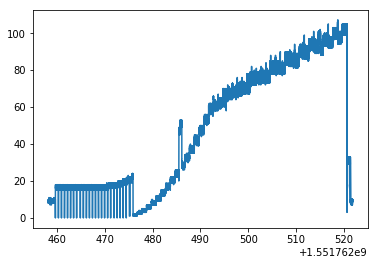

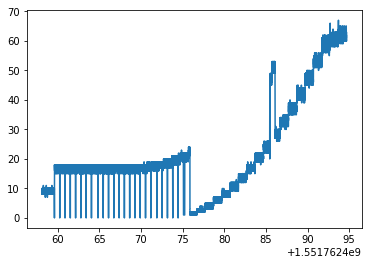

In [58]:
my_data = genfromtxt('bare_still_accum.csv', delimiter=',')
orignal = my_data.copy()
plt.figure()
plt.plot(my_data[:,1],my_data[:,0])
plt.figure()
plt.plot(my_data[:100000,1],my_data[:100000,0])
# plt.figure()
# plt.plot(my_data[:,0])
#red-128 loc1 done problem?
#blue-128 192 loc3 done

27 79


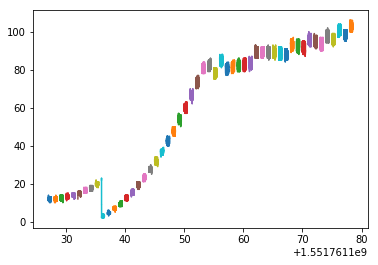

In [55]:
total = []
plt.ion()
left = 27
right = left + 52
print(left, right)
postfix = 1.5517611e9
my_data = orignal[np.logical_and(orignal[:,1]>left+postfix,orignal[:,1]<right+postfix),:]
powers = []
SNRs = []
for i in range(52):
#     print(41.5+2*i,42.5+2*i)
    diff5 = my_data[np.logical_and(my_data[:,1]>left+1*i+postfix,my_data[:,1]<left+0.5+1*i+postfix),:]
    if max(diff5[:,1]) < 36+postfix:
        max_l = max(diff5[:,0]);
        diff5 = diff5[diff5[:,0]>=max_l-4]
    total.append([np.mean(diff5[:,0]), np.var(diff5[:,0])])
#     print(max(diff5[:,0])-min(diff5[:,0]))
#     if np.var(diff5[:,0]) == 0:
#         print(diff5[:,0])
    plt.plot(diff5[:,1],diff5[:,0])

#     plt.plot(range(len(power)),power)
#         input()
plt.show()
plt.pause(1)
plt.ioff()

In [19]:
from scipy.interpolate import interp1d
def interpl(x, y, x_sample, method='nearest'):
    inter = interp1d(x, y, kind=method)
    return inter(x_sample)

In [17]:
len(total)

52

In [56]:
new_total = []
cur = 0
for i in range(0,256,5):
    new_total.append([i,total[cur][0], total[cur][1]])
    cur+=1
new_total=np.array(new_total)

In [16]:
x_sample = np.array(list(range(256)))

In [43]:
mean_y = interpl(new_total[:,0], new_total[:,1], x_sample, 'linear')

In [44]:
var_y = interpl(new_total[:,0], new_total[:,2], x_sample)

In [59]:
MV = genfromtxt('mean_var.csv', delimiter=',')

In [63]:
def get_SNR(l, delta_l):
    valid = True
    if l - delta_l < 0 or l + delta_l > 255:
        valid = False
    lower = max(0, l - delta_l)
    higher = min(255, l + delta_l)
    signal = pow((mean_y[higher] - mean_y[lower]) / 2, 2)
    noise = (var_y[higher] + var_y[lower]) / 2
    assert noise != 0
#     if signal == 0:
#         print(higher, lower)
    assert signal != 0
    SNR = 10 * np.log(signal / noise)
    return valid, SNR

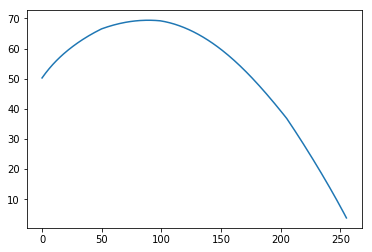

In [64]:
# fix diff
# base color - snr
fixed_diff = 50
snrs = []
for i in range(256):
    snrs.append([i, get_SNR(i, fixed_diff)[1]])
snrs = np.array(snrs)
plt.plot(snrs[:,0], snrs[:,1])

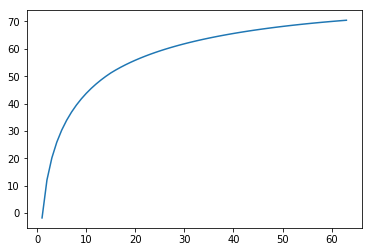

In [80]:
# fix base color
# diff - snr
base_color = 64
snrs = []
max_diff = min(255-base_color, base_color)
for i in range(1, max_diff):
    snrs.append([i, get_SNR(base_color, i)[1]])
snrs = np.array(snrs)
plt.plot(snrs[:,0], snrs[:,1])

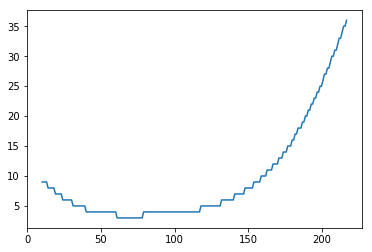

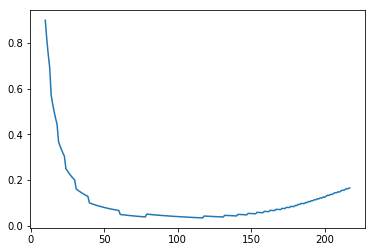

In [89]:
# fix snr
# base_color - diff
fixed_snr = 20
delta_l = []
for color in range(256):
    max_diff = min(255 - color, color)
#     for i in range(1, 256):
    for i in range(1, max_diff):
        if get_SNR(color, i)[1] > fixed_snr:
            delta_l.append([color, i, i / color])
            break
delta_l = np.array(delta_l)
plt.plot(delta_l[:,0], delta_l[:,1])
plt.figure()
plt.plot(delta_l[:,0], delta_l[:,2])

In [90]:
delta_l[64]

array([7.40000000e+01, 3.00000000e+00, 4.05405405e-02])

In [91]:
delta_l[96]

array([1.06000000e+02, 4.00000000e+00, 3.77358491e-02])

In [92]:
delta_l[128]

array([1.38000000e+02, 6.00000000e+00, 4.34782609e-02])

In [93]:
delta_l[156]

array([1.66000000e+02, 1.10000000e+01, 6.62650602e-02])

In [94]:
delta_l[192]

array([2.02000000e+02, 2.70000000e+01, 1.33663366e-01])

In [88]:
np.mean(delta_l[:,2])

0.14414938207049524